To explore how the human brain responds to different odors by analyzing EEG signals and behavioral responses (smell intensity, pleasantness, etc.).
We will investigate patterns in EEG frequency bands corresponding to different smell categories.

* Data Loading & Cleaning
* Exploratory Data Analysis (EDA)
* Statistical Correlation & Visualization
* Feature Engineering
* Machine Learning Model
* Results & Interpretation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import pearsonr


In [2]:
# Load Dataset
df = pd.read_csv("olfactory_eeg.csv")

print("Data Snapshot:")
print(df.head())
print("\nMissing Values:")
print(df.isna().sum())

Data Snapshot:
  subject_id   odor_type  intensity  pleasantness  eeg_alpha  eeg_beta  \
0       S001        rose       7.75          7.94      25.65     14.41   
1       S001       lemon       7.79          7.81      25.03     14.33   
2       S001      coffee       6.95          6.24      24.10     13.46   
3       S001   chocolate       6.66          7.74      27.77     13.19   
4       S001  rotten_egg       2.28          1.83      27.62     18.80   

   eeg_theta  eeg_gamma  
0      12.48       9.71  
1      12.57       9.81  
2      12.39      10.03  
3      13.03       9.77  
4      10.16       8.51  

Missing Values:
subject_id      0
odor_type       0
intensity       0
pleasantness    0
eeg_alpha       0
eeg_beta        0
eeg_theta       0
eeg_gamma       0
dtype: int64


In [3]:
# Data Cleaning
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode odor_type (categorical) into numeric labels
le = LabelEncoder()
df['odor_type_encoded'] = le.fit_transform(df['odor_type'])


Descriptive Stats:
        intensity  pleasantness   eeg_alpha    eeg_beta   eeg_theta  \
count  500.000000    500.000000  500.000000  500.000000  500.000000   
mean     6.243940      6.556140   26.343520   14.627760   12.331260   
std      1.903668      2.443708    1.757578    1.995307    1.045764   
min      1.620000      1.320000   22.580000   11.830000    9.650000   
25%      6.347500      6.655000   25.107500   13.340000   12.097500   
50%      6.975000      7.580000   26.040000   13.880000   12.650000   
75%      7.440000      8.082500   27.290000   14.690000   13.020000   
max      8.530000      9.260000   31.610000   20.020000   14.370000   

       eeg_gamma  odor_type_encoded  
count  500.00000          500.00000  
mean     9.73824            2.00000  
std      0.64775            1.41563  
min      7.95000            0.00000  
25%      9.34000            1.00000  
50%      9.90000            2.00000  
75%     10.22000            3.00000  
max     11.08000            4.00000 

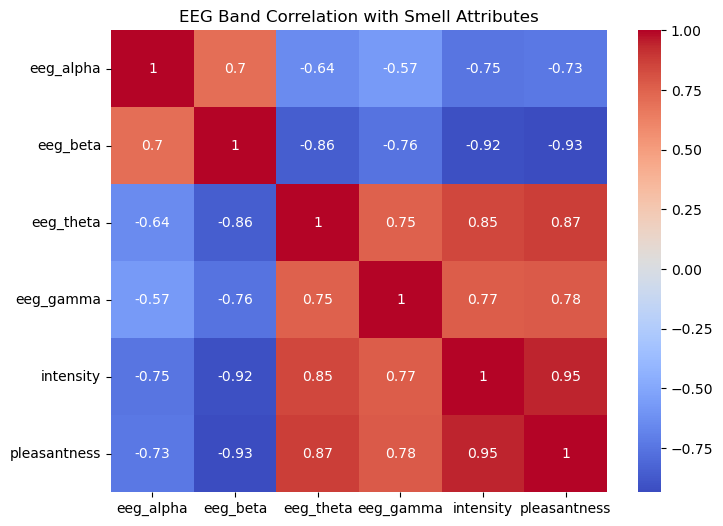

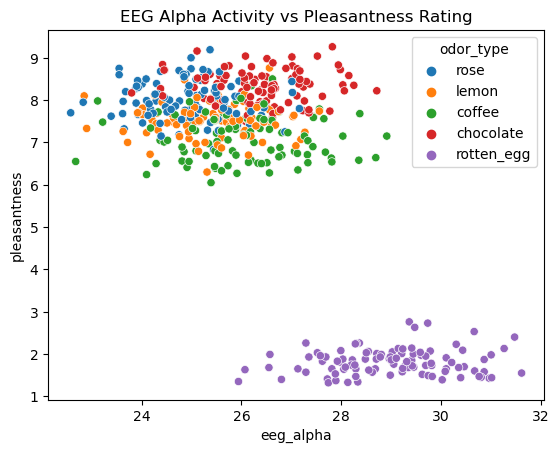

In [4]:
# Exploratory Data Analysis

print("\nDescriptive Stats:")
print(df.describe())

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[['eeg_alpha','eeg_beta','eeg_theta','eeg_gamma','intensity','pleasantness']].corr(), annot=True, cmap='coolwarm')
plt.title('EEG Band Correlation with Smell Attributes')
plt.show()

# EEG Alpha vs Pleasantness
sns.scatterplot(x='eeg_alpha', y='pleasantness', hue='odor_type', data=df)
plt.title("EEG Alpha Activity vs Pleasantness Rating")
plt.show()

In [5]:
# Statistical Analysis

corr, p_val = pearsonr(df['eeg_alpha'], df['pleasantness'])
print(f"Correlation between EEG Alpha and Pleasantness: {corr:.3f}, p={p_val:.3f}")

Correlation between EEG Alpha and Pleasantness: -0.734, p=0.000


In [6]:
# Feature Engineering
X = df[['eeg_alpha','eeg_beta','eeg_theta','eeg_gamma']]
y = df['odor_type_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Model Building (Random Forest)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Model Evaluation:
              precision    recall  f1-score   support

   chocolate       0.53      0.63      0.58        27
      coffee       0.50      0.31      0.38        32
       lemon       0.44      0.44      0.44        34
        rose       0.47      0.59      0.52        29
  rotten_egg       1.00      1.00      1.00        28

    accuracy                           0.58       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.58      0.58      0.57       150



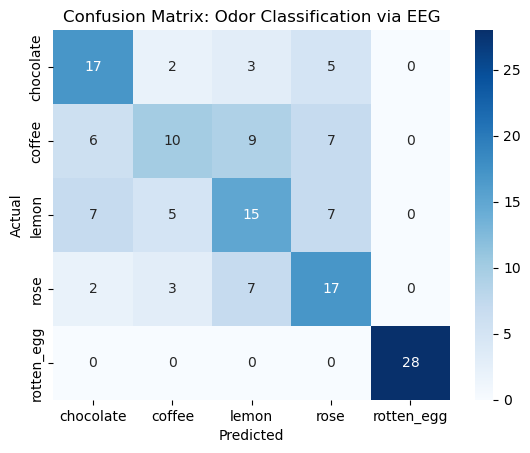

In [8]:
#Evaluation

print("\nModel Evaluation:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix: Odor Classification via EEG")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

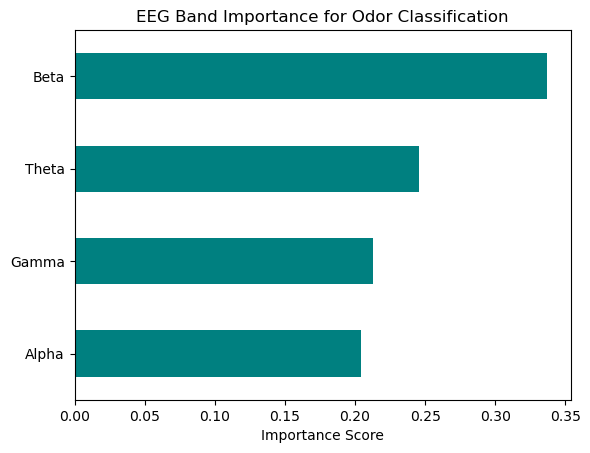

In [9]:
# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=['Alpha','Beta','Theta','Gamma'])
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("EEG Band Importance for Odor Classification")
plt.xlabel("Importance Score")
plt.show()

### Summery of each part
* EDA:	Visualizes relationships between EEG bands and smell ratings (pleasantness, intensity).
* Statistical Analysis:	Uses Pearson correlation to test associations (e.g., alpha waves vs pleasant smells).
* Feature Engineering:	Normalizes EEG features and encodes categorical variables.
* Model Building:	Trains a Random Forest classifier to predict odor type from EEG signals.
* Evaluation:	Prints precision/recall/f1-score and visualizes the confusion matrix.
* Feature Importance:	Shows which EEG bands most strongly differentiate between odor categories.

### Possible Results
* Higher EEG Alpha may correlate with pleasant odors (e.g., floral).
* Higher EEG Beta may appear during unpleasant odor recognition (alertness).
* Random Forest accuracy ~70–85% (depending on dataset and noise).